In [ ]:
# library & dataset
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Samples = 50
suffix = "mamba_test_50_5k_2w"
env_name = "DampingPendulum"
method = "KNonlinearmamba"
y = np.load("/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_data/draw_LSPN_only{}".format(Samples)+suffix+env_name+"_"+method+".npy")
x = []
for i in range(1,51):
    x.append(i)
x = np.array(x)
Y = []
for i in [0,9,19,29,39,49]:
    Y.append(y[:,i])
fig, ax = plt.subplots(figsize= (5, 3))
# The output is stored in 'violins', used to customize their appearence
violin_parts = ax.violinplot(Y, showmeans=False, 
                            showmedians=False,
                            showextrema=False, widths=0.6)
# 设置小提琴图颜色
for pc in violin_parts['bodies']:
    pc.set_facecolor('#ADD8E6')  # 浅蓝色
    pc.set_edgecolor('#00008B')  # 深蓝色
    pc.set_alpha(0.7)
    pc.set_linewidth(1)

box_parts = ax.boxplot(Y, widths=0.1, patch_artist=True, showfliers = False, showcaps = False,  manage_ticks=False)

# 设置箱线图颜色和样式
for box in box_parts['boxes']:
    box.set_facecolor('#FFFF00')  # 黄色
    box.set_linewidth(1)
    box.set_edgecolor('#008000')  # 绿色
for whisker in box_parts['whiskers']:
    whisker.set_color('#008000')
    whisker.set_linewidth(1)
for cap in box_parts['caps']:
    cap.set_color('#008000')
    cap.set_linewidth(1)
for median in box_parts['medians']:
    median.set_color('#32CD32')  # 酸橙绿
    median.set_linewidth(1)
# 提取中位数的位置，并用线连接它们
medians_y = [median.get_ydata()[0] for median in box_parts['medians']]
positions = [1, 2, 3, 4, 5, 6]
ax.plot(positions, medians_y, color='#32CD32', linestyle='-', marker='o', markersize=2)
# ax.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['1', '10', '20', '30', '40', '50'])
ax.set_xlabel('steps')
ax.set_ylabel('Log Loss')
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels(['1', '10', '20', '30', '40', '50'])
ax.set_title("predict loss")


In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
font = {'size': 12}
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['Times New Roman']
mpl.rcParams["axes.titlepad"] = 16
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 3
labels = ["*","*","BaseNet","KoopmanRNN","SDKN-DKUC","SDKN-DKAC","SDKN-DKN"]
plt.figure(figsize=(10, 3))
plt.rc('font', **font)
# markers = ['*','+','*','+','*','+','*']
env_name = env_name
title = env_name
compare = "mean"
steps = 10000
times = 100
method_index = 7
T = []
for t in range(steps):
    T.append(t+1)
T = np.array(T)
pre_data = np.load("/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_future_data/"+env_name+"{}-pre-long{}.npy".format(method_index,steps))
real_data = np.load("/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_future_data/"+env_name+"{}-real-long{}.npy".format(method_index,steps))
#print(data.shape)
plt.plot(T[:times],real_data[:times,0],'-',color = 'coral',label="real_x1", linewidth=2)#np.log10(data)
plt.plot(T[:times],real_data[:times,1],'-',color = 'orange',label="real_x2", linewidth=2)#np.log10(data)
plt.plot(T[:times],pre_data[:times,0],'--',color = 'green',label="pre_x1", linewidth=2)#np.log10(data)
plt.plot(T[:times],pre_data[:times,1],'--',color = 'blue',label="pre_x2", linewidth=2)#np.log10(data)

plt.legend(loc = 'lower right', fontsize = 10)
plt.grid(False)
plt.xlabel("steps",fontsize=12)
plt.ylabel("state",fontsize=12)
# ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
# plt.ylim([-2,1])
# plt.yticks([])
plt.title(env_name,fontsize=12)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

env_name = "DampingPendulum"
steps = 100
times = 100
method_index = 7
pre_data = np.load("/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_future_data/heatdata"+env_name+"{}-pre-long{}.npy".format(method_index,steps))
real_data = np.load("/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_future_data/heatdata"+env_name+"{}-real-long{}.npy".format(method_index,steps))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
heatdata_pre = pre_data[:times,:times,0]*pre_data[:times,:times,1]/100
heatdata_real = real_data[:times,:times,0]*real_data[:times,:times,1]/100
print(heatdata_real.shape)
# Create a dataset
# cmap = sns.color_palette("coolwarm", as_cmap=True)
# cmap = plt.get_cmap("seismic")
# 创建自定义调色板
colors = ["blue", "cyan", "yellow", "orange", "red"]
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)
# Default heatmap
sns.heatmap(heatdata_real, cmap=cmap, xticklabels=False, yticklabels=False, ax=ax1)
ax1.set_title("Nonlinear State Distribution")
ax1.set_xlabel("State X")
ax1.set_ylabel("State Y")
sns.heatmap(heatdata_pre, cmap=cmap, xticklabels=False, yticklabels=False, ax=ax2)
ax2.set_title("Nonlinear State Prediction")
ax2.set_xlabel("State X")
ax2.set_ylabel("State Y")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

env_name = "DampingPendulum"
steps = 10000
times = 100
method_index = 7
pre_data = np.load("/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_future_data/"+env_name+"{}-pre-long{}.npy".format(method_index,steps))
real_data = np.load("/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_future_data/"+env_name+"{}-real-long{}.npy".format(method_index,steps))
plt.plot(real_data[:times,0],real_data[:times,1],'-',color = "cyan",label="real_state", linewidth=2)#np.log10(data)
plt.plot(pre_data[:times,0],pre_data[:times,1],'--',color = "red",label="pre_state", linewidth=2)#np.log10(data)
# plt.plot(T,real_data[:,0],'-',color = colors[i+2],label=labels[i])#np.log10(data)
plt.legend(loc = 'lower right')
plt.grid(False)
plt.xlabel("state x",fontsize=12)
plt.ylabel("state y",fontsize=12)
# plt.ylim([-2,1])
# plt.yticks([])状态相位图
plt.title("State Phase Diagram",fontsize=12)

D:\Vscode_works\python_Vscode\mamba\Nonlinear_LSPN


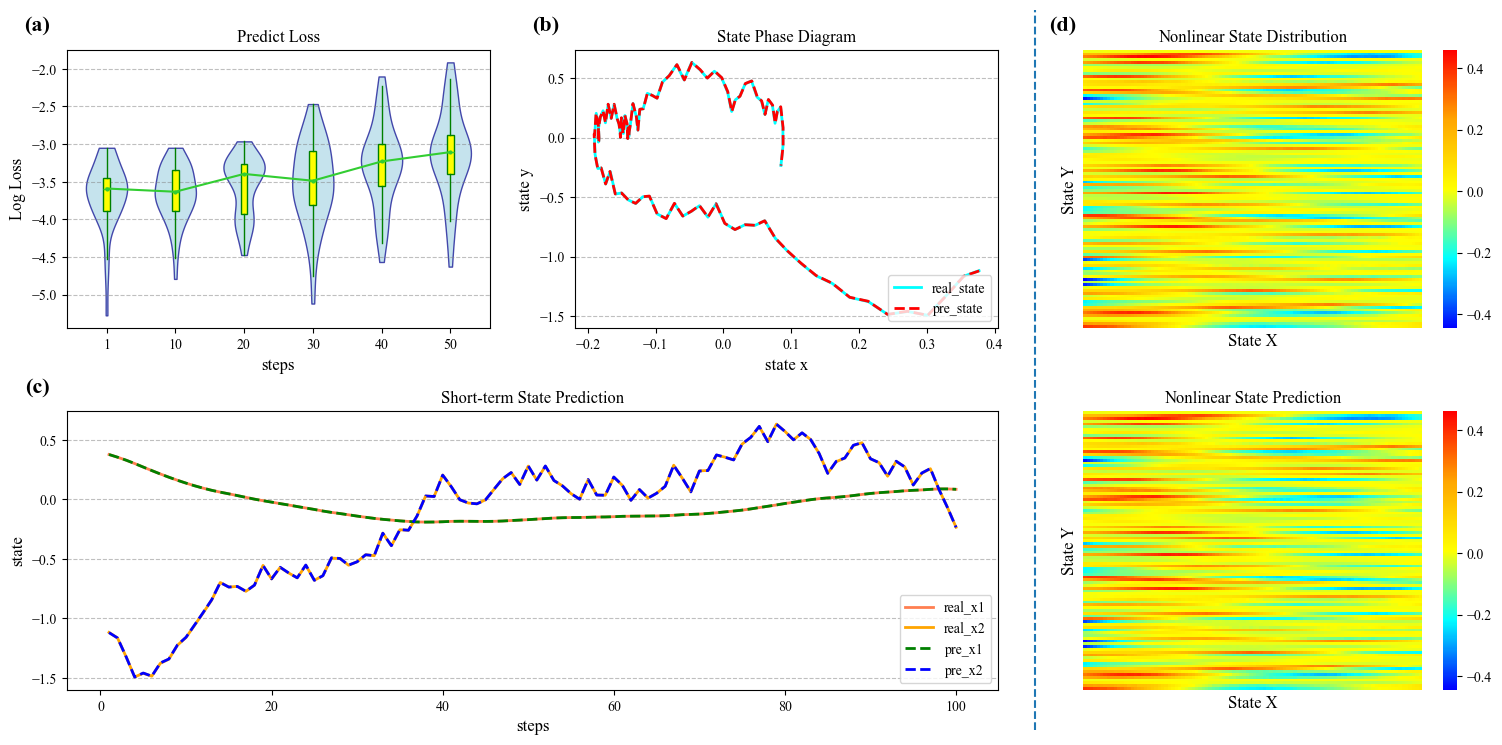

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import os
# mpl.rcParams['font.family'] = ['Times New Roman']
# mpl.rcParams["axes.titlepad"] = 16
# mpl.rcParams['lines.linewidth'] = 2
# # mpl.rcParams['lines.markersize'] = 3
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.95
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例
# plt.rcParams['savefig.dpi'] = 500 #图片像素
mpl.rcParams['font.family'] = ['Times New Roman']
# plt.rcParams['savefig.dpi'] = 500 #图片像素
os.chdir(r'D:/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN')
print(os.getcwd())
# 创建画布和网格规范
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 3)
plt.subplots_adjust(hspace=0.3)

# 第一行三张图
ax1 = fig.add_subplot(gs[0, 0])
Samples = 50
suffix = "mamba_test_50_5k_2w"
env_name = "DampingPendulum"
method = "KNonlinearmamba"
y = np.load("DATA/LSPN_predict_data/draw_LSPN_only{}".format(Samples)+suffix+env_name+"_"+method+".npy")
x = []
for i in range(1,51):
    x.append(i)
x = np.array(x)
Y = []
for i in [0,9,19,29,39,49]:
    Y.append(y[:,i])
# The output is stored in 'violins', used to customize their appearence
violin_parts = ax1.violinplot(Y, showmeans=False, 
                            showmedians=False,
                            showextrema=False, widths=0.6)
# 设置小提琴图颜色
for pc in violin_parts['bodies']:
    pc.set_facecolor('#ADD8E6')  # 浅蓝色
    pc.set_edgecolor('#00008B')  # 深蓝色
    pc.set_alpha(0.7)
    pc.set_linewidth(1)

box_parts = ax1.boxplot(Y, widths=0.1, patch_artist=True, showfliers = False, showcaps = False,  manage_ticks=False)

# 设置箱线图颜色和样式
for box in box_parts['boxes']:
    box.set_facecolor('#FFFF00')  # 黄色
    box.set_linewidth(1)
    box.set_edgecolor('#008000')  # 绿色
for whisker in box_parts['whiskers']:
    whisker.set_color('#008000')
    whisker.set_linewidth(1)
for cap in box_parts['caps']:
    cap.set_color('#008000')
    cap.set_linewidth(1)
for median in box_parts['medians']:
    median.set_color('#32CD32')  # 酸橙绿
    median.set_linewidth(1)
# 提取中位数的位置，并用线连接它们
medians_y = [median.get_ydata()[0] for median in box_parts['medians']]
positions = [1, 2, 3, 4, 5, 6]
ax1.plot(positions, medians_y, color='#32CD32', linestyle='-', marker='o', markersize=2)
# ax.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['1', '10', '20', '30', '40', '50'])
ax1.set_xlabel('steps',fontsize=12)
ax1.set_ylabel('Log Loss',fontsize=12)
ax1.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
ax1.set_xticks([1, 2, 3, 4, 5, 6])
ax1.set_xticklabels(['1', '10', '20', '30', '40', '50'])
ax1.set_title("Predict Loss",fontsize=12)
ax1.text(-0.10, 1.12, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top')


ax2 = fig.add_subplot(gs[0, 1])
env_name = "DampingPendulum"
steps = 10000
times = 100
method_index = 7
pre_data = np.load("DATA/LSPN_predict_future_data/"+env_name+"{}-pre-long{}.npy".format(method_index,steps))
real_data = np.load("DATA/LSPN_predict_future_data/"+env_name+"{}-real-long{}.npy".format(method_index,steps))
ax2.plot(real_data[:times,0],real_data[:times,1],'-',color = "cyan",label="real_state", linewidth=2)#np.log10(data)
ax2.plot(pre_data[:times,0],pre_data[:times,1],'--',color = "red",label="pre_state", linewidth=2)#np.log10(data)
# plt.plot(T,real_data[:,0],'-',color = colors[i+2],label=labels[i])#np.log10(data)
ax2.legend(loc = 'lower right')
ax2.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
ax2.set_xlabel("state x",fontsize=12)
ax2.set_ylabel("state y",fontsize=12)
ax2.set_title("State Phase Diagram",fontsize=12)
ax2.text(-0.10, 1.12, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top')

ax3 = fig.add_subplot(gs[0, 2])
env_name = "DampingPendulum"
steps = 100
times = 100
method_index = 7
pre_data = np.load("DATA/LSPN_predict_future_data/heatdata"+env_name+"{}-pre-long{}.npy".format(method_index,steps))
real_data = np.load("DATA/LSPN_predict_future_data/heatdata"+env_name+"{}-real-long{}.npy".format(method_index,steps))
heatdata_pre = pre_data[:times,:times,0]*pre_data[:times,:times,1]/100
heatdata_real = real_data[:times,:times,0]*real_data[:times,:times,1]/100
# print(heatdata_real.shape)
# 创建自定义调色板
colors = ["blue", "cyan", "yellow", "orange", "red"]
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)
# Default heatmap
sns.heatmap(heatdata_real, cmap=cmap, xticklabels=False, yticklabels=False, ax=ax3)
ax3.set_title("Nonlinear State Distribution",fontsize=12)
ax3.set_xlabel("State X",fontsize=12)
ax3.set_ylabel("State Y",fontsize=12)
ax3.text(-0.10, 1.12, '(d)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top')

# 第二行两张图，其中一张宽度较大
ax4 = fig.add_subplot(gs[1, :2])
compare = "mean"
steps = 10000
times = 100
method_index = 7
T = []
for t in range(steps):
    T.append(t+1)
T = np.array(T)
pre_data = np.load("DATA/LSPN_predict_future_data/"+env_name+"{}-pre-long{}.npy".format(method_index,steps))
real_data = np.load("DATA/LSPN_predict_future_data/"+env_name+"{}-real-long{}.npy".format(method_index,steps))
#print(data.shape)
ax4.plot(T[:times],real_data[:times,0],'-',color = 'coral',label="real_x1", linewidth=2)#np.log10(data)
ax4.plot(T[:times],real_data[:times,1],'-',color = 'orange',label="real_x2", linewidth=2)#np.log10(data)
ax4.plot(T[:times],pre_data[:times,0],'--',color = 'green',label="pre_x1", linewidth=2)#np.log10(data)
ax4.plot(T[:times],pre_data[:times,1],'--',color = 'blue',label="pre_x2", linewidth=2)#np.log10(data)

ax4.legend(loc = 'lower right', fontsize = 10)
ax4.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
ax4.set_xlabel("steps",fontsize=12)
ax4.set_ylabel("state",fontsize=12)
ax4.set_title("Short-term State Prediction",fontsize=12)
ax4.text(-0.045, 1.12, '(c)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top')

ax5 = fig.add_subplot(gs[1, 2])
env_name = "DampingPendulum"
steps = 100
times = 100
method_index = 7
pre_data = np.load("DATA/LSPN_predict_future_data/heatdata"+env_name+"{}-pre-long{}.npy".format(method_index,steps))
real_data = np.load("DATA/LSPN_predict_future_data/heatdata"+env_name+"{}-real-long{}.npy".format(method_index,steps))
heatdata_pre = pre_data[:times,:times,0]*pre_data[:times,:times,1]/100
heatdata_real = real_data[:times,:times,0]*real_data[:times,:times,1]/100
# print(heatdata_real.shape)
# 创建自定义调色板
colors = ["blue", "cyan", "yellow", "orange", "red"]
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)
# Default heatmap
sns.heatmap(heatdata_pre, cmap=cmap, xticklabels=False, yticklabels=False, ax=ax5)
ax5.set_title("Nonlinear State Prediction",fontsize=12)
ax5.set_xlabel("State X",fontsize=12)
ax5.set_ylabel("State Y",fontsize=12)

# x1 = [-100, 150]
# x2 = [4, 60]
# plt.plot([x1[0], x1[1]], [x2[1], x2[1]], color='black', linestyle='--', linewidth=2)
# plt.plot([x1[0], x1[1]], [x2[0], x2[0]], color='black', linestyle='--', linewidth=2)
# plt.plot([x1[0], x1[0]], [x2[0], x2[1]], color='black', linestyle='--', linewidth=2)
# plt.plot([x1[1], x1[1]], [x2[0], x2[1]], color='black', linestyle='--', linewidth=2)
fig.add_artist(plt.Line2D([0.655, 0.655], [0.05, 0.95], linestyle="--"))
# 调整布局以避免重叠
# plt.tight_layout()
plt.savefig("Damping_short.png",dpi = 500)
# 显示图形
plt.show()


long predict loss

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from scipy.signal import savgol_filter
from statsmodels.nonparametric.smoothers_lowess import lowess

file_path = "/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_data/steps{}".format(steps)+suffix+env_name+"_"+method+".npy"
long_loss_data = np.load(file_path)
data = np.log10(long_loss_data[2])

# 计算对数间隔下均匀分布的索引，选择适量的点
indices = np.logspace(0, np.log10(len(data)-1), num=200).astype(int)

# 创建x, y数据
x = indices
y = data[indices]

# 创建点对，以便绘制线段
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# 定义一个自定义的颜色映射
colors = [(0, 0, 1), (0, 1, 0), (1, 1, 0), (1, 0, 0)]  # R -> Y -> G -> B
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 创建颜色映射
norm = plt.Normalize(y.min(), y.max())
lc = LineCollection(segments, cmap=cm, norm=norm)
lc.set_array(y)
lc.set_linewidth(2)

fig, ax = plt.subplots(figsize=(12, 5))
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.semilogx()
plt.title('DampingPendulum Long Series Prediction Error')
plt.ylim(-4, 0)
plt.xlim(0.99, 100010)
plt.colorbar(lc, ax=ax, orientation='vertical', label='Loss Value')

plt.show()


draw long predict states

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

env_name = "DampingPendulum"
steps = 10000
times = 10000
method_index = 7
pre_data = np.load("/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_future_data/"+env_name+"{}-pre-long{}.npy".format(method_index,steps))
real_data = np.load("/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_future_data/"+env_name+"{}-real-long{}.npy".format(method_index,steps))
plt.plot(real_data[:times,0],real_data[:times,1],'-',color = "cyan",label="real_state", linewidth=2)#np.log10(data)
# plt.plot(pre_data[:times,0],pre_data[:times,1],'--',color = "red",label="pre_state", linewidth=2)#np.log10(data)
# plt.plot(T,real_data[:,0],'-',color = colors[i+2],label=labels[i])#np.log10(data)
plt.legend(loc = 'lower right')
plt.grid(False)
plt.xlabel("state x",fontsize=12)
plt.ylabel("state y",fontsize=12)
# plt.ylim([-2,1])
# plt.yticks([])状态相位图
plt.title("State Phase Diagram",fontsize=12)

1000steps

D:\Vscode_works\python_Vscode\mamba\Nonlinear_LSPN


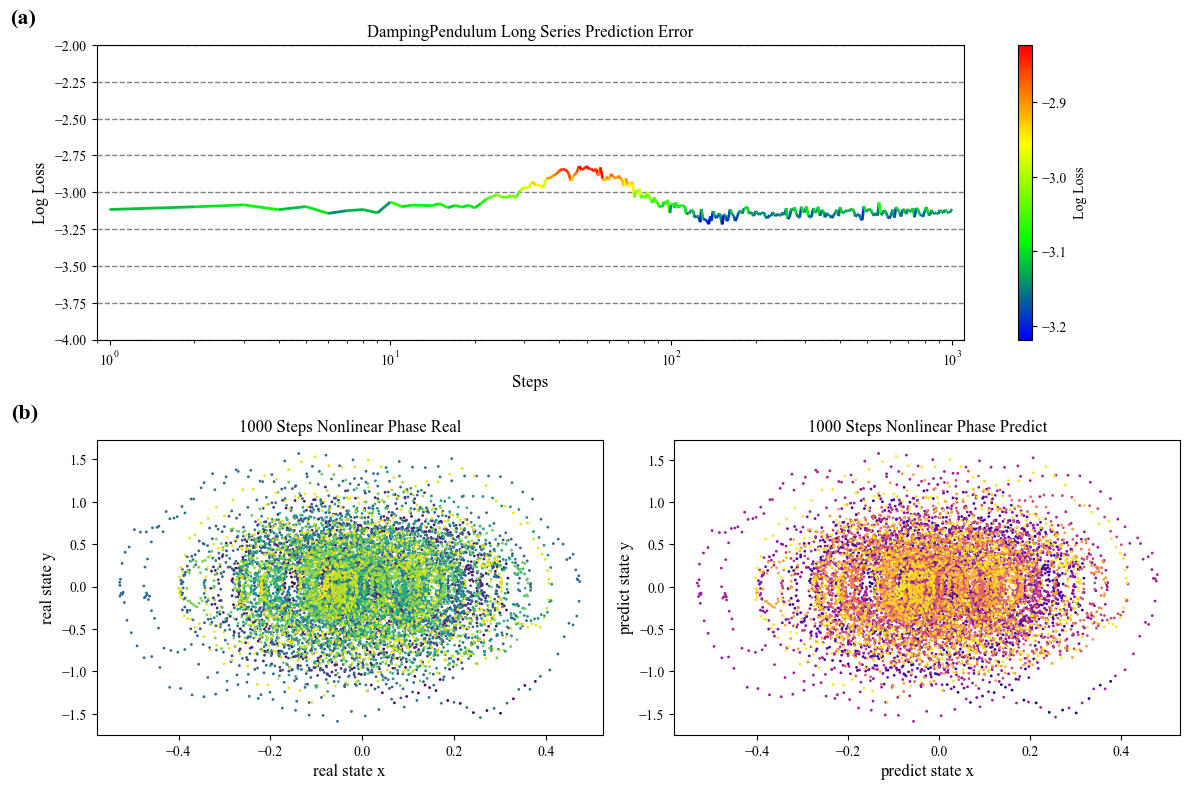

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from scipy.signal import savgol_filter
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib as mpl
import os
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.95
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例
mpl.rcParams['font.family'] = ['Times New Roman']
# plt.rcParams['savefig.dpi'] = 500 #图片像素
os.chdir(r'D:/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN')
print(os.getcwd())
env_name = "DampingPendulum"
steps = 1000
suffix = "mamba_test6"
method = "KNonlinearmamba"
# file_path = "/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/DATA/LSPN_predict_data/steps{}".format(steps)+suffix+env_name+"_"+method+".npy"
file_path = "DATA/LSPN_predict_data/steps{}".format(steps)+suffix+env_name+"_"+method+".npy"

long_loss_data = np.load(file_path)
data = np.log10(long_loss_data[2])
# 计算对数间隔下均匀分布的索引，选择适量的点
indices = np.logspace(0, np.log10(len(data)-1), num=500).astype(int)

# 创建x, y数据
x = indices
y = data[indices]

# 创建点对，以便绘制线段
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# 定义一个自定义的颜色映射
colors = [(0, 0, 1), (0, 1, 0), (1, 1, 0), (1, 0, 0)]  # R -> Y -> G -> B
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 创建颜色映射
norm = plt.Normalize(y.min(), y.max())
lc = LineCollection(segments, cmap=cm, norm=norm)
lc.set_array(y)
lc.set_linewidth(2)

# 创建图形和子图
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])  # 创建网格布局，第一行高度比第二行大

# 填充第一个子图
ax1 = fig.add_subplot(gs[0, :])  # 第一行占满整行
ax1.add_collection(lc)
ax1.autoscale()
ax1.margins(0.1)
ax1.semilogx()
ax1.set_title('DampingPendulum Long Series Prediction Error',fontsize=12)
ax1.set_xlabel("Steps",fontsize=12)
ax1.set_ylabel("Log Loss",fontsize=12)
ax1.set_ylim(-4, -2)
ax1.set_xlim(0.9, steps+0.1*steps)
ax1.grid(True, which='both', linestyle='--', color="grey", linewidth=1, axis='y')
# 添加颜色条
cbar = plt.colorbar(lc, ax=ax1, orientation='vertical', label='Log Loss')
cbar.set_ticks([-3.2, -3.1, -3.0, -2.9])  # 设置自定义刻度位置
# cbar.set_ticklabels(['Min', 'Mean', 'Max'])  # 设置自定义刻度标签
ax1.text(-0.10, 1.12, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top')

# 第二行留空，创建两个空子图
ax2 = fig.add_subplot(gs[1, 0])  # 第二行第一个位置
env_name = "DampingPendulum"
suffix = "mamba_test_50_5k_2w"
steps = 10000
times = 10000
method_index = 7
pre_data = np.load("DATA/LSPN_predict_future_data/"+env_name+"{}-pre-long{}.npy".format(method_index,steps))
real_data = np.load("DATA/LSPN_predict_future_data/"+env_name+"{}-real-long{}.npy".format(method_index,steps))

# theta = np.linspace(0, 4*np.pi, 10000)
# x_phase = np.sin(theta)
# y_phase = np.cos(theta) * np.sin(theta)
colors = plt.cm.viridis(np.linspace(0, 1, times))
ax2.scatter(real_data[:times,0],real_data[:times,1], c=colors, s=1)
ax2.set_title('1000 Steps Nonlinear Phase Real', fontsize=12)
ax2.set_xlabel("real state x",fontsize=12)
ax2.set_ylabel("real state y",fontsize=12)
# ax2.set_title('Subplot 2')
ax2.text(-0.17, 1.12, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top')

ax3 = fig.add_subplot(gs[1, 1])  # 第二行第二个位置
colors = plt.cm.plasma(np.linspace(0, 1, times))
ax3.scatter(pre_data[:times,0],pre_data[:times,1], c=colors, s=1)
ax3.set_title('1000 Steps Nonlinear Phase Predict', fontsize=12)
ax3.set_xlabel("predict state x",fontsize=12)
ax3.set_ylabel("predict state y",fontsize=12)

plt.tight_layout()
plt.savefig("Damping_1000.png",dpi = 500)
plt.show()


100000 steps

D:\Vscode_works\python_Vscode\mamba\Nonlinear_LSPN


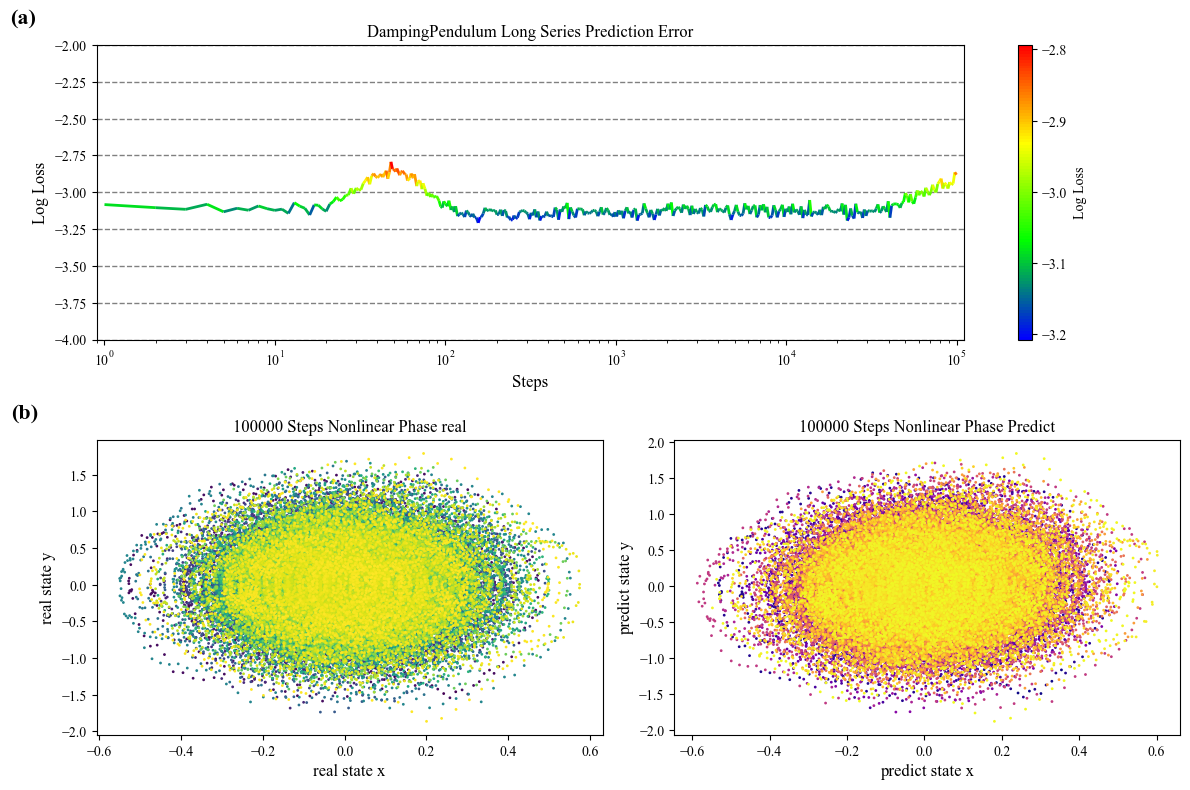

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from scipy.signal import savgol_filter
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.95
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例
mpl.rcParams['font.family'] = ['Times New Roman']
# plt.rcParams['savefig.dpi'] = 500 #图片像素
os.chdir(r'D:/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN')
print(os.getcwd())
import os

env_name = "DampingPendulum"
steps = 100000
suffix = "mamba_test6"
method = "KNonlinearmamba"
file_path = "DATA/LSPN_predict_data/steps{}".format(steps)+suffix+env_name+"_"+method+".npy"
long_loss_data = np.load(file_path)
data = np.log10(long_loss_data[2])
# 计算对数间隔下均匀分布的索引，选择适量的点
indices = np.logspace(0, np.log10(len(data)-1), num=500).astype(int)

# 创建x, y数据
x = indices
y = data[indices]

# 创建点对，以便绘制线段
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# 定义一个自定义的颜色映射
colors = [(0, 0, 1), (0, 1, 0), (1, 1, 0), (1, 0, 0)]  # R -> Y -> G -> B
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 创建颜色映射
norm = plt.Normalize(y.min(), y.max())
lc = LineCollection(segments, cmap=cm, norm=norm)
lc.set_array(y)
lc.set_linewidth(2)

# 创建图形和子图
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])  # 创建网格布局，第一行高度比第二行大

# 填充第一个子图
ax1 = fig.add_subplot(gs[0, :])  # 第一行占满整行
ax1.add_collection(lc)
ax1.autoscale()
ax1.margins(0.1)
ax1.semilogx()
ax1.set_title('DampingPendulum Long Series Prediction Error',fontsize=12)
ax1.set_xlabel("Steps",fontsize=12)
ax1.set_ylabel("Log Loss",fontsize=12)
ax1.set_ylim(-4, -2)
ax1.set_xlim(0.9, 110000)
ax1.grid(True, which='both', linestyle='--', color="grey", linewidth=1, axis='y')
# 添加颜色条
cbar = plt.colorbar(lc, ax=ax1, orientation='vertical', label='Log Loss')
cbar.set_ticks([-3.2, -3.1, -3.0, -2.9, -2.8])  # 设置自定义刻度位置
# cbar.set_ticklabels(['Min', 'Mean', 'Max'])  # 设置自定义刻度标签
ax1.text(-0.10, 1.12, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top')

# 第二行留空，创建两个空子图
ax2 = fig.add_subplot(gs[1, 0])  # 第二行第一个位置
env_name = "DampingPendulum"
suffix = "mamba_test_50_5k_2w"
steps = 100000
times = 100000
method_index = 7
pre_data = np.load("DATA/LSPN_predict_future_data/"+env_name+"{}-pre-long{}.npy".format(method_index,steps))
real_data = np.load("DATA/LSPN_predict_future_data/"+env_name+"{}-real-long{}.npy".format(method_index,steps))

# theta = np.linspace(0, 4*np.pi, 10000)
# x_phase = np.sin(theta)
# y_phase = np.cos(theta) * np.sin(theta)
colors = plt.cm.viridis(np.linspace(0, 1, times))
ax2.scatter(real_data[:times,0],real_data[:times,1], c=colors, s=1)
ax2.set_title('100000 Steps Nonlinear Phase real', fontsize=12)
ax2.set_xlabel("real state x",fontsize=12)
ax2.set_ylabel("real state y",fontsize=12)
# ax2.set_title('Subplot 2')
ax2.text(-0.17, 1.12, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top')

ax3 = fig.add_subplot(gs[1, 1])  # 第二行第二个位置
colors = plt.cm.plasma(np.linspace(0, 1, times))
ax3.scatter(pre_data[:times,0],pre_data[:times,1], c=colors, s=1)
ax3.set_title('100000 Steps Nonlinear Phase Predict', fontsize=12)
ax3.set_xlabel("predict state x",fontsize=12)
ax3.set_ylabel("predict state y",fontsize=12)

plt.tight_layout()
plt.savefig("Damping_100000.png",dpi = 500)
plt.show()
